In [4]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

ride_data.head()
city_data.head()
# Combine the data into a single dataset
comb_data = pd.merge(city_data,ride_data, on = 'city')

# Display the data table for preview
comb_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

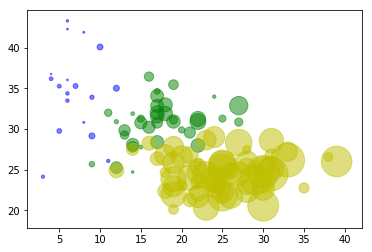

Text(0.5,1,'Pyber Fares')

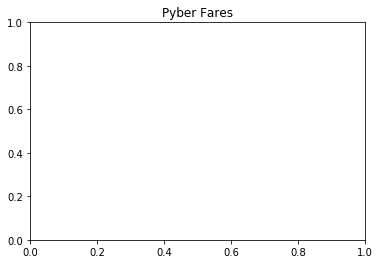

In [48]:
# Obtain the x and y coordinates for each of the three city types
rural_df = comb_data[comb_data['type'] == 'Rural']
urban_df = comb_data[comb_data['type'] == 'Urban']
suburban_df = comb_data[comb_data['type'] == 'Suburban']

groupedrural_df = comb_data[comb_data['type'] == 'Rural'].groupby(['city']).agg({'ride_id' : 'count', 'driver_count': 'sum','fare' : 'mean'})
groupedurban_df = comb_data[comb_data['type'] == 'Urban'].groupby(['city']).agg({'ride_id' : 'count', 'driver_count': 'sum','fare' : 'mean'})
groupedsuburban_df = comb_data[comb_data['type'] == 'Suburban'].groupby(['city']).agg({'ride_id' : 'count', 'driver_count': 'sum','fare' : 'mean'})

groupedurban_df.head()

# Build the scatter plots for each city types

#ax1 = groupedurban_df.plot.scatter(x = 'ride_id', y = 'fare' 
#           ,edgecolors = 'k', c = 'darksalmon', s = groupedurban_df['driver_count']*.5, alpha = .5)

#ax2 = groupedrural_df.plot.scatter(x = 'ride_id', y = 'fare' 
#           ,edgecolors = 'k', c = 'yellow', s = groupedrural_df['driver_count']*.5, alpha = .5, ax = ax1)

#ax3 = groupedsuburban_df.plot.scatter(x = 'ride_id', y = 'fare' 
#           ,edgecolors = 'k', c = 'green', s = groupedsuburban_df['driver_count']*.5, alpha = .5, ax = ax1)



plt.scatter(groupedsuburban_df['ride_id'], groupedsuburban_df['fare'] ,s=groupedsuburban_df['driver_count']*.5,  c='g', alpha=0.5)
plt.scatter(groupedrural_df['ride_id'], groupedrural_df['fare'] ,s=groupedrural_df['driver_count']*.5,  c='b', alpha=0.5)
plt.scatter(groupedurban_df['ride_id'], groupedurban_df['fare'] , s=groupedurban_df['driver_count']*.5, c='y', alpha=0.5)
plt.show()
plt.title('Pyber Fares')


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()